# SymPyとは
代数演算のライブラリです。  
Symbolicな演算（文字を数値としてではなくそのまま計算する演算）を可能にします。  

In [1]:
import sympy as sy
sy.init_printing()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## シンボルの定義

In [3]:
# シンボルを定義
a = sy.Symbol("a")
a

In [4]:
# 複数のシンボルを同時に定義
x, y = sy.symbols("x y")

In [5]:
# LaTexの記法を使える（raw文字列にしないとエスケープ文字と認識する）
theta, gamma = sy.symbols(r"\theta \gamma")
theta, gamma

In [6]:
# 正の実数として定義
r = sy.Symbol("r", positive=True)

# 実数として定義
q = sy.Symbol("q", real=True)

文字の情報を与えないと非常に一般的な複素数として計算することがあるので、なるべく情報を与えるようにしましょう。

## 基本演算

In [7]:
a**2 + x - theta

In [8]:
a**2 / a

In [9]:
(x + y)**3

### 式の展開など

In [10]:
f = (x + y)**3
f.expand()

In [11]:
# x^2の係数
f.expand().coeff(x, n=2)

## 微分や極限

In [12]:
f = sy.sin(x)/x
f.limit(x, 0)

In [13]:
# xで偏微分
f = 3 * x**2 * y + x * y**2
f.diff(x)

In [14]:
# 代入（シンボルも代入できる）
f.subs([(y, a**2)])

## NumPyのufuncに変換
シンボリックな表現をNumPyのufuncに変換できます。  
これは結構すごいと思います。  
シンボリックな計算をしたあと、数値計算を簡単にすることができます。

In [15]:
x, a, b, c = sy.symbols("x a b c")
f = a * x**2 + b * x + c
f

In [16]:
# ４引数を持つ関数を定義
args = (x, a, b, c)
func = sy.lambdify(args, f, "numpy")

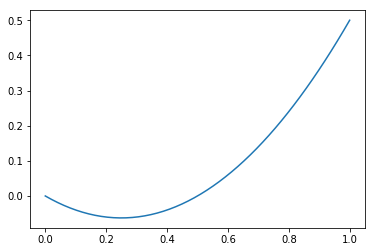

In [17]:
# 実際に数値を代入(ufuncとして振る舞い、ベクトル演算が可能)
xx = np.linspace(0, 1)
plt.plot(xx, func(xx, 1, -0.5, 0))
plt.show()